# An Investigation of Sorting Algorithms

## Libraries

In [1]:
import numpy as np # For randomly generating numbers
import pandas as pd #For reading csv files, generating dataframes and plots for same
import time

## Introduction

<b>A sorting algorithm arranges a list of items in some predetermined order.</b> In terms of strings this may involve sorting elements in alphabethical order. For the purposes of this investigation, I'm going to look at ordering discrete numerical elements, in ascending order, for smallest to biggest. Sorting is essentially a permutation of list elements, and does not alter any of the elements in the list. 

Much of early computing advancements focused on finding effective sorting methods. This is because sorting elements allow for a number of tasks to be completed quicker than in a list of unsorted items. It's essential in data analysis, when determining the maximum, minimum, median and inter-quartile range. Also, sorting is often pre-processing step in search algorithms, allowing for more effective identification of specific or duplicate entries.

**Terminology**

* With respect to duplicate entries, a **stable sorting algorithm** will preserve the order of duplicate entries while an **unstable sorting algorithm** will not. 


* An **in-place sorting algorithm** uses a fixed additional amount of working space, and is independent of it's input size. Another definition of an in-place algorithm states that the input is usually overwritten by the output as the algorithm executes. In-place algorithm updates input sequence only through replacement or swapping of elements. 


In the course of this investigation, I will discuss and benchmark the following sorting algorithms:
* Bubble Sort
* Insertion Sort
* Merge Sort
* Bucket Sort
* Tim Sort

I have chosen these sorting algorithms as they include examples of simple and effective comparison based sorting algorithms, non-comparison based sorting algorithms and hybrid sorting algorithms. I will discuss these types of sortings algorithms with reference to the specific examples I have chosen, and plot their running time against the input size of lists to be sorted. To more effectively compare these algorithms, I will also run each algorithm ten times for each input, and determine the average running time.

## Functions
### Generating Random Data

In [2]:
def rand(n):
    array = []
    for i in range(0, n, 1): # for every integer between 1 and n
        gen_rand= np.random.randint(0, 100) # generate a random number
        array.append(gen_rand) # and add it to the array
    return array

### Benchmarking Functions

In [3]:
#Inputs each random array to each function ONLY ONCE
#Returns running time in milliseconds
def compare_all():
    array_1 = []    
    rand_size = [10, 50, 100, 250, 500, 750, 1000, 5000, 7500, 10000]
    functions = [bubbleSort, insertionSort, mergeSort, bucketSort, timSort]
    
    for func in functions: #For every function
        for i in rand_size: #For every input size i
                size = rand(i) #generate a random array of i values
                start = time.time()
                func(size) #pass the array to the function
                end = time.time()
                clock = round(((end - start)*1000), 3) #calculate running time in milliseconds
                array_1.append(clock) #Add running time value to array_1

    df = pd.DataFrame({'Input Size': rand_size, 'BubbleSort': array_1[slice(0, 10, 1)], 
                       'InsertionSort': array_1[slice(10, 20, 1)], 'MergeSort': array_1[slice(20, 30, 1)], 
                             'BucketSort':array_1[slice(30, 40, 1)], 'TimSort':array_1[slice(40, 50, 1)]})
    
    df.to_csv("data/run_once.csv", index=False)

In [4]:
#Input an array with 100 values
#Returns the mean of every 10 values, as an array
def mean_array(the_array):
    average_time = []
    y1 = np.mean(the_array[slice(0, 10, 1)])
    y2 = np.mean(the_array[slice(10, 20, 1)])
    y3 = np.mean(the_array[slice(20, 30, 1)])
    y4 = np.mean(the_array[slice(30, 40, 1)])
    y5 = np.mean(the_array[slice(40, 50, 1)])
    y6 = np.mean(the_array[slice(50, 60, 1)])
    y7 = np.mean(the_array[slice(60, 70, 1)])
    y8 = np.mean(the_array[slice(70, 80, 1)])
    y9 = np.mean(the_array[slice(80, 90, 1)])
    y10 =np.mean(the_array[slice(90, 100, 1)])
    
    results = [y1, y2, y3, y4, y5, y6, y7, y8, y9, y10]
    return results

In [5]:
#Inputs each random array to each function ten times
#Returns average running time in milliseconds
def bench_ten_runs():
    results=[]
    average_time = []
    final_array= []
    num_runs = 10
    rand_size = [10, 50, 100, 250, 500, 750, 1000, 5000, 7500, 10000]
    functions = [bubbleSort, insertionSort, mergeSort, bucketSort, timSort]
    
  
    for func in functions: #For each function
        for i in rand_size: #input a value
            size = rand(i) 
            for r in range(num_runs):#ten times
                start = time.time()
                func(size) 
                end = time.time()
                clock = (end - start)*1000
                results.append(clock)  # Add time elapsed to array results
        average_time = mean_array(results) # Find average time, for each i in rand_size, using mean_array()
        average_time = np.round(average_time, 3) # Round result to 3 dps
        final_array.append(average_time) # Append to final_array
        average_time = [] #set both average_time
        results=[]  #and results to [], before passing through the next function
        
    df4 = pd.DataFrame({'Input Size': rand_size, 'BubbleSort': final_array[0], 
                       'InsertionSort': final_array[1], 'MergeSort': final_array[2], 
                             'BucketSort':final_array[3], 'TimSort':final_array[4]})
    
    df4.to_csv("data/avg_ten_runs.csv", index=False)

## Discussion of Sorting Algorithms

### Bubble Sort

Bubble Sort compares every number to it's adjacent number(s), and returns the larger number of the two, in the position with the larger index. It continues this process multiple times, looping through the array, until the set is fully sorted. 

Comparison based

In place sorting

can be practical in cases where data is almost fully sorted

Time complexity is n in the best case, n^2 in the average and worst cases.

<img src="https://www.w3resource.com/w3r_images/bubble-short.png" style="width: 600px;"  align= "left"/>

In [6]:
def bubbleSort(alist):
    for passnum in range(len(alist)-1,0,-1): 
        for i in range(passnum): #Goes through a list from last value to first
            if alist[i]>alist[i+1]: # Compares every value to value on its left
                temp = alist[i]  
                alist[i] = alist[i+1] 
                alist[i+1] = temp #If statement swap two values, so the larger value has the larger index
            
# Reference: interactivepython.org/runestone/static/pythonds/SortSearch/TheBubbleSort.html, accessed 13th April 2019.

In [7]:
%timeit(bubbleSort)

39.6 ns ± 1.48 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [8]:
start =time.time()
bubbleSort(rand(10)) #10 random variables
end = time.time()
np.round((end - start)* 1000, 3)

0.0

In [9]:
start =time.time()
bubbleSort(rand(10000)) #10,000
end = time.time()
np.round((end - start)* 1000, 3)

19851.017

### Insertion Sort vs. Binary Insertion Sort

stable, in place and works well on small sets and on sets that are almost fully sorted 

very inefficient for large random sets 

iterative

In normal insertion sort, it takes O(n) comparisons(at nth iteration) in worst case. We can reduce it to O(log n) by using binary search.



In [10]:
def binary_search(the_array, item, start, end):
    if start == end:
        if the_array[start] > item:
            return start
        else:
            return start + 1
    if start > end:
        return start

    mid = round((start + end)/ 2) #Returns the mean of the range of indices 
    
    # determine which side to search
    if the_array[mid] < item:
        return binary_search(the_array, item, mid + 1, end) # search array of indices above mid

    elif the_array[mid] > item:
        return binary_search(the_array, item, start, mid - 1) # search array of indices above mid

    else:
        return mid # Otherwise mid = item, so return mid

In [11]:
def insertionSort(the_array):
        
    l = len(the_array) #set l to the number of values in array
    for index in range(1, l): #for the every index
        value = the_array[index] #set value
        pos = binary_search(the_array, value, 0, index - 1) 
        the_array = the_array[:pos] + [value] + the_array[pos:index] + the_array[index+1:]
    

#Reference:http://interactivepython.org/courselib/static/pythonds/SortSearch/TheInsertionSort.html, accessed 13th April 2019.
#Reference:http://skerritt.tech/blog/timsort/, accessed 13th April 2019.

In [12]:
%timeit(insertionSort)

46.3 ns ± 2.82 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [13]:
start =time.time()
insertionSort(rand(10)) #10 random variables
end = time.time()
np.round((end - start)* 1000, 3)

0.0

In [14]:
start =time.time()
insertionSort(rand(10000)) #10,000 random variables
end = time.time()
np.round((end - start)* 1000, 3)

1966.494

### Merge Sort

In [15]:
def mergeSort(alist):

    if len(alist)>1:
        mid = len(alist)//2 #get value of middle index
        lefthalf = alist[:mid] #lower subarray is below mid
        righthalf = alist[mid:] #upper subarray is above mid

        mergeSort(lefthalf) 
        mergeSort(righthalf) #Pass both subarrays back into merge sort

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                alist[k]=lefthalf[i]
                i=i+1 
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1 
        
            
#Reference: http://interactivepython.org/courselib/static/pythonds/SortSearch/TheMergeSort.html, accessed 13th April 2019.

In [16]:
%timeit(mergeSort)

80.3 ns ± 9.46 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [17]:
start =time.time()
mergeSort(rand(10)) #10 random variables
end = time.time()
np.round((end - start)* 1000, 3)

0.0

In [18]:
start =time.time()
mergeSort(rand(10000)) #10,000 random variables
end = time.time()

np.round((end - start)* 1000, 3)

141.035

In [19]:
start =time.time()
mergeSort(rand(100000))
end = time.time()

np.round((end - start)* 1000, 3)

2286.579

### Bucket Sort

**WIKI says**

Bucket sort is a divide and conquer sorting algorithm that generalizes counting sort by partitioning an array into a finite number of buckets. Each bucket is then sorted individually, either using a different sorting algorithm, or by recursively applying the bucket sorting algorithm.

A bucket sort works best when the elements of the data set are evenly distributed across all buckets.

In [20]:
def bucketSort(alist):
    largest = max(alist) #Set max
    length = len(alist) #Set input size = length
    size = largest/length
 
    buckets = [[] for _ in range(length)]
    for i in range(length):
        j = int(alist[i]/size)
        if j != length:
            buckets[j].append(alist[i])
        else:
            buckets[length - 1].append(alist[i])
 
    for i in range(length):
        insertionSort(buckets[i])
 
    result = []
    for i in range(length):
        result = result + buckets[i]

#Reference: https://www.sanfoundry.com/python-program-implement-bucket-sort/, accessed 13th April 2019.

In [21]:
%timeit(bucketSort)

62.2 ns ± 2.52 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [22]:
start =time.time()
bucketSort(rand(10))
end = time.time()
np.round((end - start)* 1000, 3)

0.997

In [23]:
start =time.time()
bucketSort(rand(100000))
end = time.time()

np.round((end - start)* 1000, 3)

41105.924

### TimSort

**WIKI SAYS**
Timsort is a hybrid stable sorting algorithm, derived from merge sort and insertion sort, designed to perform well on many kinds of real-world data.

The algorithm finds subsequences of the data that are already ordered, and uses that knowledge to sort the remainder more efficiently. This is done by merging an identified subsequence, called a run, with existing runs until certain criteria are fulfilled. Timsort has been Python's standard sorting algorithm since version 2.3. 

In [24]:
def merge(left, right): #Input is two sorted lists
    if not left:
        return right
    if not right:
        return left
    if left[0] < right[0]:
        return [left[0]] + merge(left[1:], right)
    return [right[0]] + merge(left, right[1:])

#Reference:http://skerritt.tech/blog/timsort/, accessed 13th April 2019.

In [25]:
def timSort(the_array):
 
    runs, sorted_runs = [], []
    length = len(the_array)
    new_run = [the_array[0]]

    # for every i in the range of 1 to length of array
    for i in range(1, length):
        # if i is at the end of the list
        if i == length - 1:
            new_run.append(the_array[i])
            runs.append(new_run)
            break
        # if the i'th element of the array is less than the one before it
        if the_array[i] < the_array[i-1]:
            # if new_run is set to None (NULL)
            if not new_run:
                runs.append([the_array[i]])
                new_run.append(the_array[i])
            else:
                runs.append(new_run)
                new_run = []
        # else if its equal to or more than
        else:
            new_run.append(the_array[i])

    # for every item in runs, append it using insertion sort
    for item in runs:
        sorted_runs.append(insertionSort(item))
    
    # for every run in sorted_runs, merge them
    sorted_array = []
    for run in sorted_runs:
        sorted_array = merge(sorted_array, run)


#Reference:http://skerritt.tech/blog/timsort/, accessed 13th April 2019.

In [26]:
%timeit(timSort)

44.4 ns ± 1.41 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [27]:
start =time.time()
timSort(rand(100000))
end = time.time()
np.round((end - start)* 1000, 3)

649.16

## Comparing Sorting Algorithms 

In [28]:
compare_all()

In [29]:
df = pd.read_csv('data/run_once.csv')
df

,Input Size,BubbleSort,InsertionSort,MergeSort,BucketSort,TimSort
0,10,0.000,0.000,0.000,0.000,0.000
1,50,1.002,0.000,0.000,0.000,0.000
2,100,1.999,0.999,0.998,0.000,0.000
3,250,27.006,3.001,2.000,0.999,0.000
4,500,56.011,9.002,4.001,3.000,1.001
5,750,112.027,17.009,6.002,4.003,0.999
6,1000,200.051,30.008,9.002,7.002,2.001
7,5000,5161.306,433.108,58.015,95.024,11.004
8,7500,11381.875,933.236,82.020,191.048,16.003
9,10000,20301.131,1610.411,113.028,351.089,19.004


In [30]:
ax = df.plot(x='Input Size', y=['BubbleSort', 'InsertionSort', 'MergeSort', 'BucketSort', 'TimSort'])
ax.set_ylabel("Time Elapsed (milliseconds)");

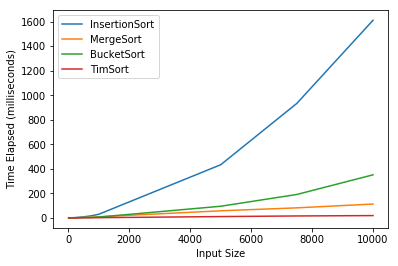

In [31]:
ax = df.plot(x='Input Size', y=['InsertionSort', 'MergeSort', 'BucketSort', 'TimSort'])
ax.set_ylabel("Time Elapsed (milliseconds)");

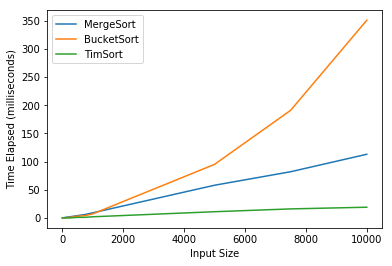

In [32]:
ax = df.plot(x='Input Size', y=['MergeSort', 'BucketSort', 'TimSort'])
ax.set_ylabel("Time Elapsed (milliseconds)");

## Benchmarking Sorting Algorithms

In [33]:
bench_ten_runs()

In [34]:
df2 = pd.read_csv('data/avg_ten_runs.csv')
df2

,Input Size,BubbleSort,InsertionSort,MergeSort,BucketSort,TimSort
0,10,0.000,0.100,0.000,0.000,0.100
1,50,0.300,0.300,0.200,0.100,0.100
2,100,1.300,1.000,0.500,0.400,0.200
3,250,6.401,3.101,1.400,1.200,0.500
4,500,25.706,8.302,3.001,2.901,3.001
5,750,57.815,15.504,4.901,5.702,1.500
6,1000,109.227,24.306,6.602,9.602,2.000
7,5000,2831.616,423.007,48.412,114.829,12.103
8,7500,6117.146,1164.194,77.319,258.766,17.204
9,10000,11128.713,1666.421,106.126,404.802,27.907


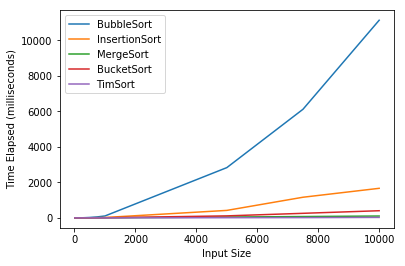

In [35]:
ax = df2.plot(x='Input Size', y=['BubbleSort','InsertionSort', 'MergeSort', 'BucketSort', 'TimSort'])
ax.set_ylabel("Time Elapsed (milliseconds)");

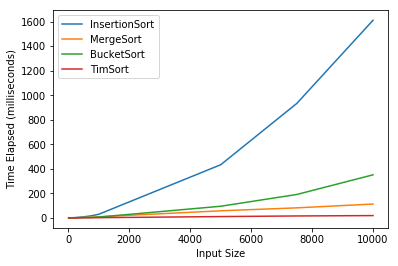

In [36]:
ax = df.plot(x='Input Size', y=['InsertionSort', 'MergeSort', 'BucketSort', 'TimSort'])
ax.set_ylabel("Time Elapsed (milliseconds)");

## References


#### Documentation
* [The Python Standard Library](https://docs.python.org/3/library/)
> * [Time](https://docs.python.org/3/library/time.html) function, accessed 13th April 2019. 
> * [Reading and Writing CSV files](https://docs.python.org/3/library/csv.html), accessed 13th April 2019.
* [Pandas Documentation]()
> * [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) function, accessed 13th April 2019.
___

#### Wikipedia Pages 
* [In-Place Algorithm](https://en.wikipedia.org/wiki/In-place_algorithm), accessed 25 April 2019.

#### Other 
* [Binary Insertion Sort](https://www.geeksforgeeks.org/binary-insertion-sort/), page on geeksforgeeks.org, accessed 25 April 2019.